## Menentukan Pertanyaan Bisnis

- Bagaimana pola rata‑rata jumlah rental per jam pada hari kerja vs hari libur selama 2011–2012?
- Seberapa besar penurunan total rental harian ketika kondisi cuaca ekstrem dibanding cuaca normal pada 2011–2012? (cuaca buruk = 3 atau 4)
- Bagaimana tren bulanan rata‑rata durasi sewa dan frekuensi rental antara pengguna casual vs registered pada 2011–2012?

## Import Semua Packages/Library yang Digunakan

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [216]:
# Load dataset day.csv
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [217]:
# Load dataset hour.csv
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- dataset day.csv berisikan informasi rental bike dalam rentang waktu harian
- dataset hour.csv berisikan informasi rental bike dalam rentang waktu per jam
- Struktur kolom kedua dataset sepertinya relatif konsisten
- Berdasarkan readme pada dataset, 'hour.csv' adalah versi granular dari 'day.csv'. Saya akan pakai 'hour.csv' saja.
- Berdasarkan readme dataset menyimpan record dalam rentang waktu 2 tahun (2011-2012)

### Assessing Data

In [218]:
# Cek struktur dan tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Semua kolom di semua dataset memiliki tipe data quantitative kecuali kolom 'dteday'
- kolom dteday bisa di ubah ke format datetime untuk analisis waktu

In [219]:
# Cek missing values
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada missing value di semua kolom, jadi tidak perlu imputasi atau drop.

In [220]:
# Cek row duplikat
dupe_count = hour_df.duplicated().sum()
print(f"Data Duplikat: {dupe_count}")

Data Duplikat: 0


**Insight:**
- Tidak menenumkan data duplikat, berarti setiap data sudah unik

In [221]:
# Cek descriptive statistic
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Beberapa fields punya nama yang kurang intuitive, harus melakukan rename

In [222]:
# Cek Unique & Frekuensi di kolom kolom kategorikal
for col in ['season','mnth','hr','weekday','workingday','holiday','weathersit']:
    print(col, hour_df[col].value_counts().sort_index(), sep='\n', end='\n\n')

season
season
1    4242
2    4409
3    4496
4    4232
Name: count, dtype: int64

mnth
mnth
1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
Name: count, dtype: int64

hr
hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: count, dtype: int64

weekday
weekday
0    2502
1    2479
2    2453
3    2475
4    2471
5    2487
6    2512
Name: count, dtype: int64

workingday
workingday
0     5514
1    11865
Name: count, dtype: int64

holiday
holiday
0    16879
1      500
Name: count, dtype: int64

weathersit
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64



**Insight:**
- season ada 4 kategori (1–4)
- weathersit didominasi 1–2 (hanya sedikit ‘3’ dan hampir tidak ada ‘4’)
- workingday/holiday flag sudah tampak benar (proporsi weekend vs weekday sesuai ekspektasi)

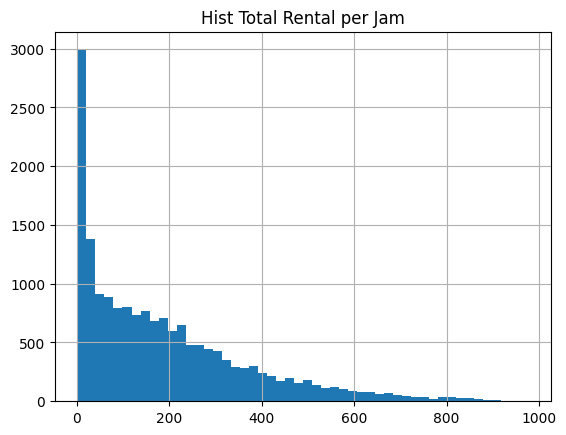

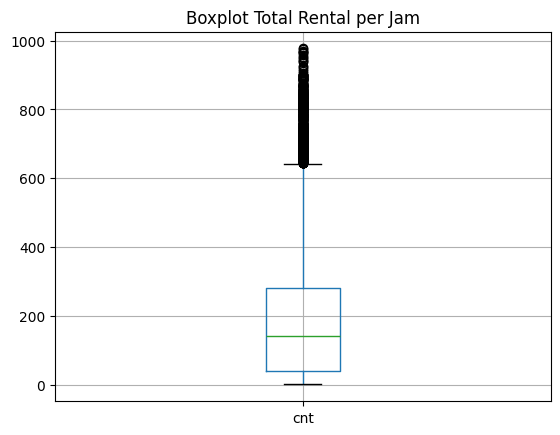

In [223]:
# Cek Distribusi Numerik
plt.figure()
hour_df['cnt'].hist(bins=50)
plt.title('Hist Total Rental per Jam')
plt.show()

plt.figure()
hour_df.boxplot(column='cnt')
plt.title('Boxplot Total Rental per Jam')
plt.show()

**Insight:**
- `cnt` sangat right-skewed, banyak nilai kecil, beberapa jam puncak sangat tinggi. Hal ini dapat mempengaruhi rata-rata
- Outlier pada kolom `cnt` yaitu jam-jam puncak sepertinya tidak perlu di hapus dan dimodifikasi karena benar-benar mencerminkan jam-jam sibuk (commuting time)

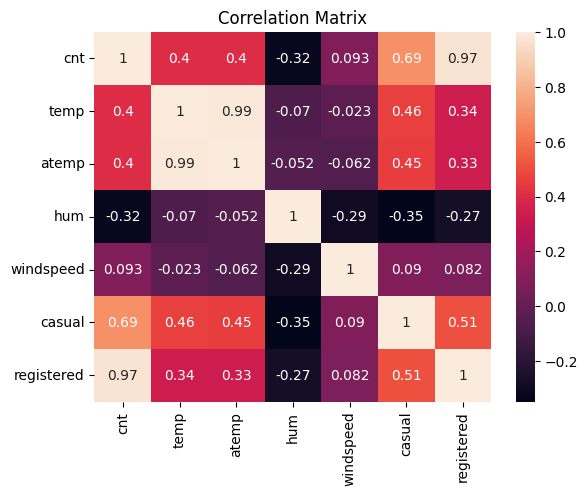

In [224]:
# Cek korelasi antar variable
corr = hour_df[['cnt','temp','atemp','hum','windspeed','casual','registered']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

**Insight:**
- `cnt` sangat berkorelasi positif dengan registered & casual ini sangat wajar
- `cnt` cukup berkorelasi dengan temp/atemp, negatif dengan hum ini terlihat benar
- `windspeed` korelasinya lemah, kemungkinan tidak akan berdampak signifikan

### Cleaning Data

In [225]:
# ganti nama fields agar lebih readable dan intuitive
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'date',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_rent_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

hour_df.head()

,rec_id,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_rent_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- nama kolom semakin mudah dibaca, tetapi valuenya tidak.

In [226]:
# Mapping nilai kolom kategorikal dengan value yang deskriptif
list_season = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

list_month = {
    1: 'January',  2: 'February', 3: 'March',
    4: 'April',    5: 'May',      6: 'June',
    7: 'July',     8: 'August',   9: 'September',
    10: 'October', 11: 'November',12: 'December'
}

list_year = {
    0: '2011',
    1: '2012'
}

list_day = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

list_weather = {
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}

list_option = {
    0: 'No',
    1: 'Yes'
}



# Apply mapping
hour_df['season'] = hour_df['season'].map(list_season)
hour_df['month'] = hour_df['month'].map(list_month)
hour_df['year'] = hour_df['year'].map(list_year)
hour_df['weekday'] = hour_df['weekday'].map(list_day)
hour_df['weather_condition'] = hour_df['weather_condition'].map(list_weather)
hour_df['is_holiday'] = hour_df['is_holiday'].map(list_option)
hour_df['is_workingday'] = hour_df['is_workingday'].map(list_option)
hour_df['date'] = pd.to_datetime(hour_df['date']) # sekalian konversi date ke format datetime

**Insight:**
- melakukan mapping untuk kolom-kolom kategorikal
- sekilas mapping terlihat berhasil, tetapi harus validasi lebih dalam lagi

In [227]:
# Validasi mapping dan cek apakah ada missing value karena ke gagalan mapping

# cek apakah ada missing value
hour_df.info()
hour_df.isna().sum()

# cek apakah jumlah category nya cocok
hour_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  object        
 3   year               17379 non-null  object        
 4   month              17379 non-null  object        
 5   hour               17379 non-null  int64         
 6   is_holiday         17379 non-null  object        
 7   weekday            17379 non-null  object        
 8   is_workingday      17379 non-null  object        
 9   weather_condition  17379 non-null  object        
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

,rec_id,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_rent_count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,July,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- mapping berhasil tidak ada missing value
- jumlah kategori pada tiap tiap kolom cocok

In [228]:
# ubah kolom 'hour' ke format yang lebih informatif
hour_df['hour'] = hour_df['hour'].apply(lambda x: f"{x:02d}:00")
hour_df['hour']

0        00:00
1        01:00
2        02:00
3        03:00
4        04:00
         ...  
17374    19:00
17375    20:00
17376    21:00
17377    22:00
17378    23:00
Name: hour, Length: 17379, dtype: object

**Insight:**
- Kolom `hour` lebih enak dibaca dan cocok untuk visualisasi
- Tipe data untuk `hour` sudah sesuai karena kita perlakukan sebagai label kategori

## Exploratory Data Analysis (EDA)

### Explore Pola Rata‑Rata Rental per Jam: Hari Kerja vs Hari Libur

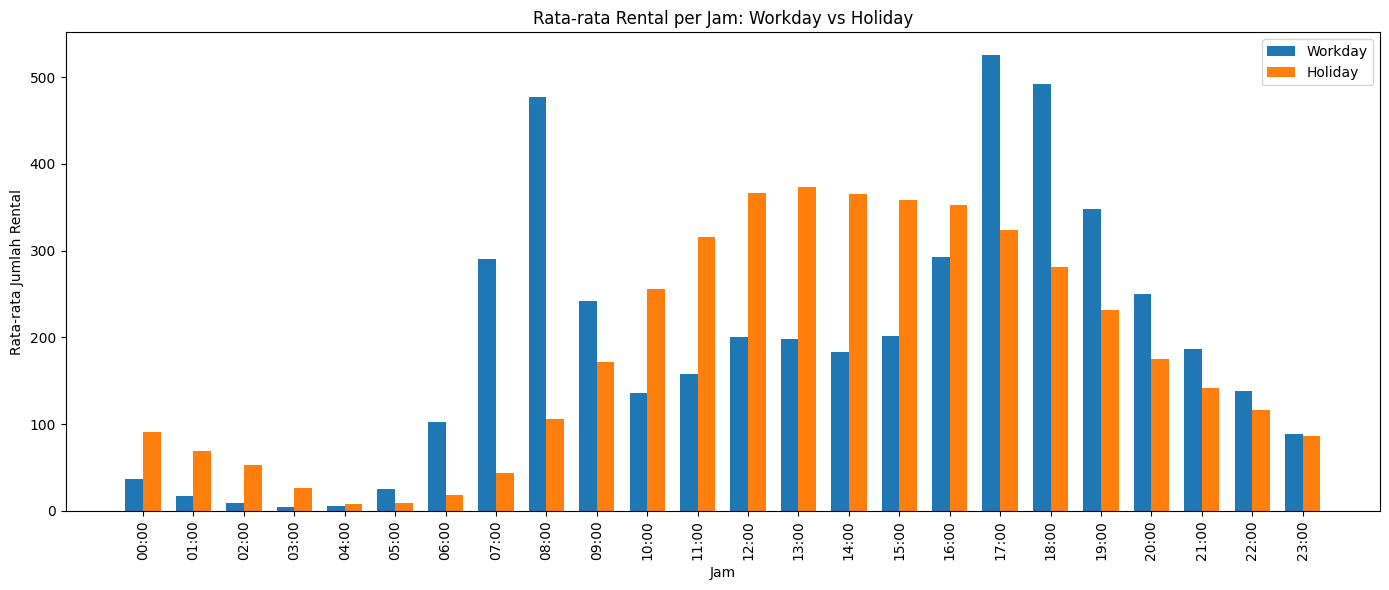

In [229]:
# bikin eda 1 untuk agregasi rata‑rata jumlah rental per jam
eda1 = hour_df.pivot_table(
    values='total_rent_count',              
    index='hour',
    columns='is_workingday',
    aggfunc='mean'
)

# Melakukan ename kolom 
eda1.rename(columns={'Yes':'Workday','No':'Holiday'}, inplace=True)
eda1 = eda1.reindex(sorted(eda1.index), axis=0)

hours = eda1.index.tolist()
x = np.arange(len(hours))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, eda1['Workday'], width, label='Workday')
plt.bar(x + width/2, eda1['Holiday'], width, label='Holiday')
plt.xticks(x, hours, rotation=90)
plt.title('Rata-rata Rental per Jam: Workday vs Holiday')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Rental')
plt.legend()
plt.tight_layout()
plt.show()


**Insight:**
- Dari grafik diatas cukup jelas ada 2 peak hours: sekitar *pukul 8 pagi* dan *5-6 sore* untuk workday
- Untuk holiday tertinggi ada di siang hari, sekitar jam 12:00 - 15:00 siang
- Jumlah rental relatif rendah saat tengah malam higga subuh

### Explore Perbandingan Hari Kerja vs Hari Libur

In [230]:
daily = (
    hour_df
    .reset_index()  
    .groupby('date')['total_rent_count']
    .sum()
    .to_frame('daily_rental')
)

# menentukan kondisi cuaca
weather_daily = (
    hour_df
    .reset_index()
    .groupby('date')['weather_condition']
    .agg(lambda x: x.mode().iloc[0])
    .to_frame('weather_condition')
)

# membuat kolom baru yaitu grup cuaca
daily = daily.join(weather_daily)
daily['weather_group'] = daily['weather_condition'].apply(
    lambda w: 'Bad' if w in ['Light Snow/Rain', 'Heavy Rain/Snow'] else 'Normal'
)

# agregasi rata‑rata rental harian per grup
eda2 = daily.groupby('weather_group')['daily_rental'] \
            .mean() \
            .reset_index()

eda2

,weather_group,daily_rental
0,Bad,2199.736842
1,Normal,4630.720058


**Insight:**
- Perbedaan antara grup cuaca Bad dan normal cukup jauh
- Terlihat jelas ada penurunan yang signifikan pada jumlah rental saat cuaca buruk

### Explore Rata‑Rata Rental Casual vs Registered

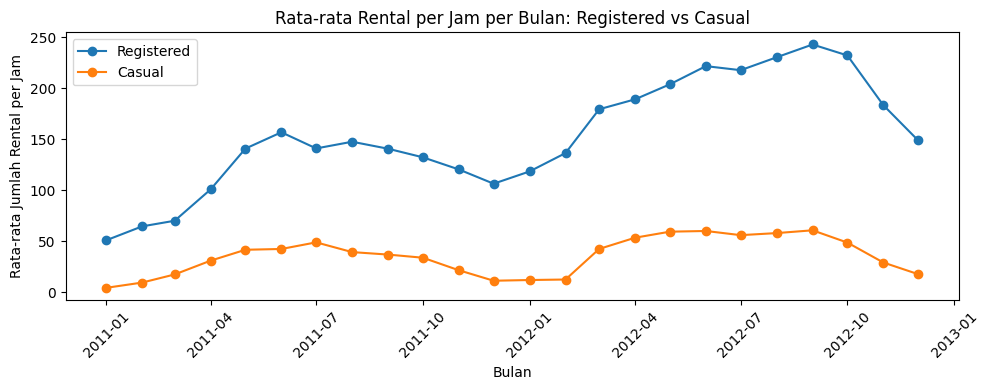

In [231]:
hour_df['date'] = pd.to_datetime(hour_df['date'])
hour_df.set_index('date', inplace=True)

eda3 = (
    hour_df
    .resample('MS')[['casual','registered']]
    .mean()
    .rename(columns={'casual':'rental_casual','registered':'rental_registered'})
    .reset_index()
)

# bikin line chart sederhana
plt.figure(figsize=(10,4))
plt.plot(eda3['date'], eda3['rental_registered'], marker='o', label='Registered')
plt.plot(eda3['date'], eda3['rental_casual'],    marker='o', label='Casual')
plt.title('Rata‑rata Rental per Jam per Bulan: Registered vs Casual')
plt.xlabel('Bulan')
plt.ylabel('Rata‑rata Jumlah Rental per Jam')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight:**
- Sepanjang periode, frekuensi rental registered jauh lebih tinggi daripada casual
- Keduanya menunjukkan pola “naik di musim panas, turun di musim dingin” setiap tahun, menegaskan sensitifitas rental musim

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola rata‑rata jumlah rental per jam pada hari kerja vs hari libur selama 2011–2012?

Puncak Workday : 17:00, ≈ 525 sepeda/jam
Puncak Holiday : 13:00, ≈ 373 sepeda/jam


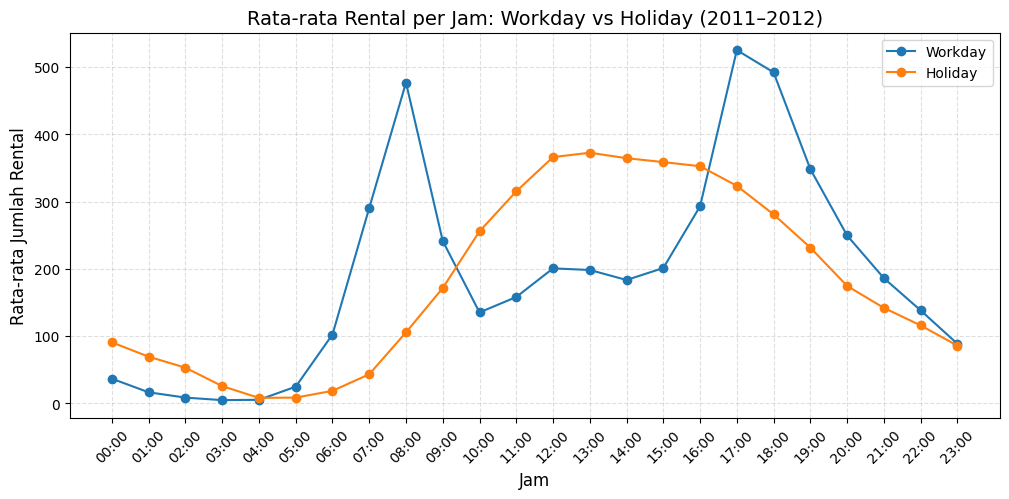

In [232]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(eda1.index, eda1['Workday'],  marker='o', label='Workday')
ax.plot(eda1.index, eda1['Holiday'],  marker='o', label='Holiday')

ax.set_title('Rata‑rata Rental per Jam: Workday vs Holiday (2011–2012)', fontsize=14)
ax.set_xlabel('Jam', fontsize=12)
ax.set_ylabel('Rata‑rata Jumlah Rental', fontsize=12)
ax.set_xticks(eda1.index)         
ax.set_xticklabels(eda1.index, rotation=45)
ax.grid(ls='--', alpha=0.4)
ax.legend()

peak_work_idx = eda1['Workday'].idxmax()     
peak_work_val = eda1['Workday'].max()
peak_hol_idx  = eda1['Holiday'].idxmax()
peak_hol_val  = eda1['Holiday'].max()

print(f'Puncak Workday : {peak_work_idx}, ≈ {peak_work_val:.0f} sepeda/jam')
print(f'Puncak Holiday : {peak_hol_idx}, ≈ {peak_hol_val:.0f} sepeda/jam')


**Insight:**
- Hari kerja: puncak sewa di jam 08:00 (berangkat) & 17:00 (pulang) ‑‑ sampai ≈ 525 sepeda/jam
- Hari libur: puncak bergeser ke 13:00 ‑‑ ≈ 373 sepeda/jam
- Volume puncak weekday ± 40 % lebih tinggi daripada weekend
- Hari kerja menampilkan dua puncak komute 08:00 & 1:00—masing‑masing ±525 sepeda/jam
- Rentang 02:00 – 04:00 < 10 rental/jam di kedua jenis hari


### Pertanyaan 2: Seberapa besar penurunan total rental harian ketika kondisi cuaca ekstrem dibanding cuaca normal pada 2011–2012? (cuaca buruk = 3 atau 4)

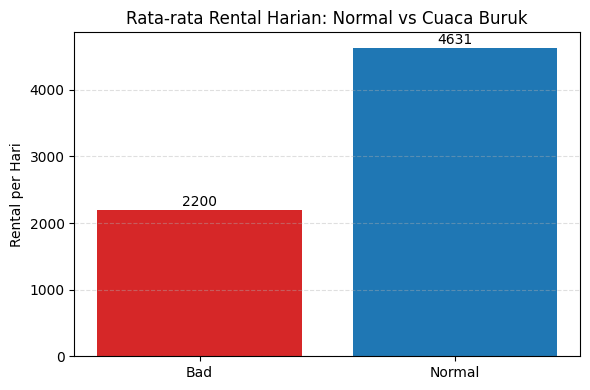

Penurunan ≈ 2431 sepeda/hari (52.5 %) pada cuaca buruk.


In [233]:
mean_normal = eda2.loc[eda2['weather_group']=='Normal', 'daily_rental'].iloc[0]
mean_bad    = eda2.loc[eda2['weather_group']=='Bad',    'daily_rental'].iloc[0]
drop_abs  = mean_normal - mean_bad
drop_pct  = drop_abs / mean_normal * 100

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(eda2['weather_group'], eda2['daily_rental'],
       color=['tab:red','tab:blue'])       
for i,v in eda2.iterrows():
    ax.text(i, v['daily_rental']+50, f"{v['daily_rental']:.0f}",
            ha='center', fontsize=10)

ax.set_title('Rata‑rata Rental Harian: Normal vs Cuaca Buruk')
ax.set_ylabel('Rental per Hari')
ax.grid(axis='y', ls='--', alpha=0.4)
plt.tight_layout()
plt.show()

print(f"Penurunan ≈ {drop_abs:.0f} sepeda/hari ({drop_pct:.1f} %) pada cuaca buruk.")

**Insight:**
- Rata‑rata sewa harian pada hari cuaca normal sekitar 4631 sepeda
- Rata‑rata sewa harian pada hari cuaca buruk (hujan / salju) sekitar 2200 sepeda
- Terdapat penurunan sekitar 2 431 sepeda per hari (± 52 %) saat cuaca buruk

### Pertanyaan 3: Bagaimana tren bulanan rata‑rata durasi sewa dan frekuensi rental antara pengguna casual vs registered pada 2011–2012?

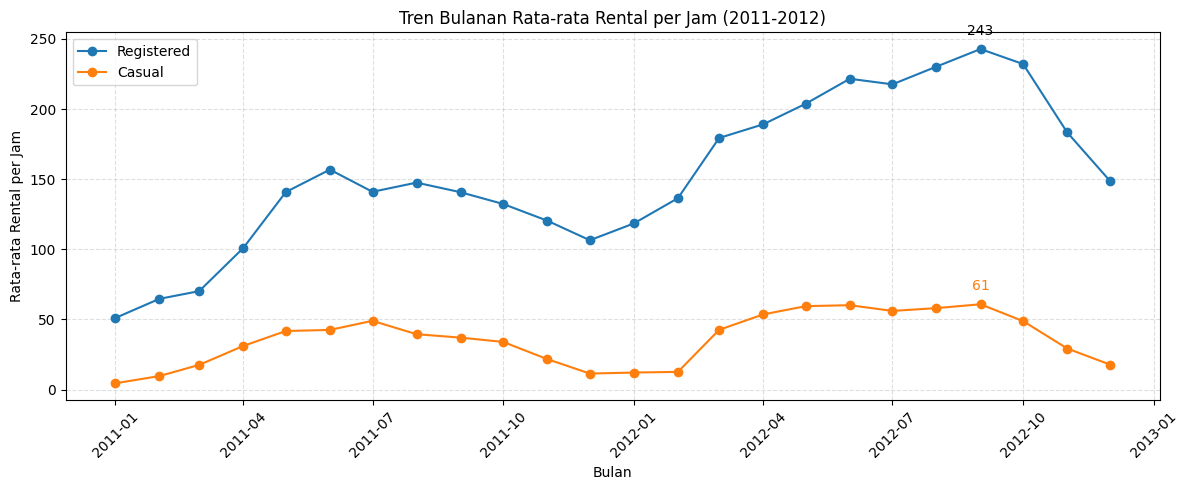

Registered menyumbang ≈ 81% dari total rental rata‑rata dua tahun.


In [234]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(eda3['date'], eda3['rental_registered'], marker='o', label='Registered')
ax.plot(eda3['date'], eda3['rental_casual'],    marker='o', label='Casual')

# memperjelas titik tertinggi dan juga titik terendah
peak_reg = eda3.loc[eda3['rental_registered'].idxmax()]
ax.annotate(f"{peak_reg['rental_registered']:.0f}",
            xy=(peak_reg['date'], peak_reg['rental_registered']),
            xytext=(0,10), textcoords='offset points', ha='center')

peak_cas = eda3.loc[eda3['rental_casual'].idxmax()]
ax.annotate(f"{peak_cas['rental_casual']:.0f}",
            xy=(peak_cas['date'], peak_cas['rental_casual']),
            xytext=(0,10), textcoords='offset points', ha='center', color='tab:orange')

ax.set_title('Tren Bulanan Rata‑rata Rental per Jam (2011‑2012)')
ax.set_xlabel('Bulan')
ax.set_ylabel('Rata‑rata Rental per Jam')
ax.legend()
ax.grid(ls='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menghitung sepanjang 2 tahun
share_reg = (eda3['rental_registered'].sum() /
            (eda3['rental_registered'] + eda3['rental_casual']).sum() * 100)
print(f"Registered menyumbang ≈ {share_reg:.0f}% dari total rental rata‑rata dua tahun.")

**Insight:**
- Pengguna registered konsisten mendominasi dengan rata‑rata sekitar 80% dari total rental
- Puncak registered terjadi di Agustus 2012 (240 rental/jam); puncak casual di Juli 2012 (60 rental/jam)
- Kedua segmen menunjukkan pola musiman: naik di musim panas (Mei–Sep), turun di musim dingin (Jan–Feb)

## Analisis Lanjutan (Opsional)

### Clustering untuk mengevaluasi dampak suhu udara terhadap permintaan rental.

C:\Users\nicho\AppData\Local\Temp\ipykernel_19036\1335956562.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('zona_suhu')['total_rent_count']


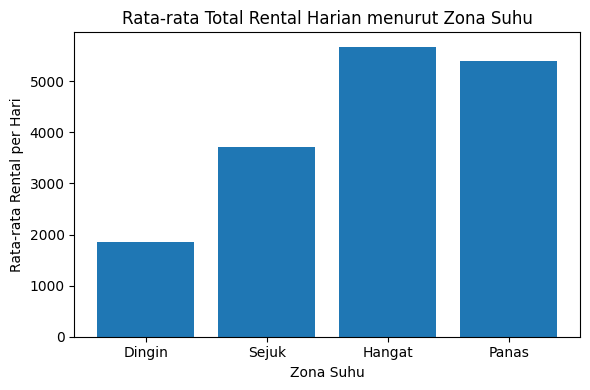

In [235]:
hour_df['temp_c'] = hour_df['temp'] * 41
bins  = [-1, 10, 20, 30, 50]
labels = ['Dingin','Sejuk','Hangat','Panas']
hour_df['zona_suhu'] = pd.cut(hour_df['temp_c'], bins=bins, labels=labels)


daily_temp = (hour_df
              .reset_index()
              .groupby('date')
              .agg({'total_rent_count':'sum',
                    'zona_suhu'       :lambda x: x.mode().iloc[0]}))

eda4 = (daily_temp
        .groupby('zona_suhu')['total_rent_count']
        .mean()
        .reset_index())

# bikin plot
plt.figure(figsize=(6,4))
plt.bar(eda4['zona_suhu'], eda4['total_rent_count'])
plt.title('Rata‑rata Total Rental Harian menurut Zona Suhu')
plt.xlabel('Zona Suhu')
plt.ylabel('Rata‑rata Rental per Hari')
plt.tight_layout()
plt.show()


**Insight:**
- zona suhu Hangat menunjukkan permintaan tertinggi (5700 rental/hari), ini make sense karena itu suhu ideal untuk bersepeda
- zona suhu Dingin paling rendah (1900 rental/hari), sangat jelas bahwa cuaca dingin drastis menurunkan pengunaan sepeda
- zona suhu Panas turun sedikit dibanding Hangat (5400 rental/hari), menandakan suhu panas mulai mengurangi minat bersepeda

### Download csv hasil olahan untuk dashboard

In [236]:
hour_df.to_csv('dashboard/main_data.csv', index=False) 

## Conclusion

##### Conclusion pertanyaan 1
Selama 2011‑2012 pola pemakaian sepeda terbagi jelas antara hari kerja dan hari libur. Pada hari kerja terdapat dua lonjakan komuter—pagi sekitar 08 : 00 dan sore 17 : 00—dengan volume puncak ± 525 sewa/jam. Sebaliknya, hari libur menampilkan satu puncak rekreasi di 13 : 00 (± 373 sewa/jam). Di luar jam‑jam tersebut, permintaan turun drastis (≤ 10 sewa/jam antara 02–04 pagi).
Aksi yang dapat dilakukan:
- Redistribusi terjadwal - sebelum jam 06:00 penuhi area stasiun lalu sore harinya pindahkan ke pusat bisnis
- Penempatan akhir pekan - tambahkan resource di area wisata/taman mulai 10:00, kurangi di kawasan perkantoran.
- Slot maintenance - jadwalkan perawatan antara jam 01–04 pagi saat aktivitas minimal.

##### Conclusion pertanyaan 2
Rata‑rata total sewa harian pada hari cuaca normal tercatat ± 4 631 sewa. Ketika cuaca buruk (weathersit 3–4) angka ini turun ke ± 2 200 sewa, setara penurunan ~ 2 430 sewa per hari (‑52 %).
Aksi yang dapat dilakukan
- Bebankan aktivitas maintenance di hari‑hari prakiraan hujan/salju.
- Tampilkan peringatan cuaca di aplikasi untuk membantu pengguna merencanakan perjalanan.

##### Conclusion pertanyaan 3
Pengguna registered adalah tulang punggung layanan, menyumbang ≈ 81 % dari total sewa rerata. Trafik registered memuncak di Agustus 2012 (~ 243 sewa/jam), sedangkan casual mencapai puncak di Juli 2012 (~ 61 sewa/jam). Keduanya mengalami siklus musiman yang sama: naik Mei–September (cuaca hangat) lalu turun tajam pada musim dingin Januari–Februari.
Aksi yang dapat dilakukan::
- Retensi member - tawarkan paket member tahunan & reward member.
- Musim panas - Buat banyak event bersepeda pada periode Mei–Agustus.
- Musim dingin - sediakan aksesoris cuaca dingin (sarung tangan, penutup sadel) & tarif yang lebih rendah.